# Лабораторная работа №3

ФИО: Кузнецова Анна Андреевна  
Группа: БИВТ-21-2

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №7 в семестре (Занятие №3 очное)

Что необходимо сделать:  
- Обучить различного рода модели машинного обучения и сравнить их между собой  

---
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/11600OkqdRzxc-xZmFTuBs099VeAqU_GlE0Bx6bBlIRE/edit?usp=sharing) необходимо узнать название своего датасета 
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1Phm-Fq1GL-VX7NS-DCEMRh_Fo1wU7DQ9?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. Загрузить необходимые данные к себе и считать (read) их в переменную.
2. Понять, у вас задача классификации (бинарной или многоклассовой) или регрессии (**если у вас многоклассовая классификация, прочтите P.S.S. внизу**).
3. Сделать предобработку данных:  
     1. Разделить выборку на тренировочную (train) и тестовую (test). _Обратите внимание, что обучать скейлеры и определять, какими значениями вы будете заполнять пропуски, вы будете на train выборке, а применять и на train, и на test_.
     2. Проверить пропуски в данных. Если они есть, заполнить одной из стратегий, предложенных в ноутбуке для семинара №3. P.S. Для численных и категориальных переменных будут разные стратегии.
     3. Отнормировать численные переменные (`StandardScaler`, `MinMaxScaler`).
     4. Закодировать категориальные признаки по одной из стратегий.
4. Обучить на тренировочном множестве:
     1. Линейную модель (`LogisticRegression`, `LinearRegression`)
     2. Деревянную модель (`DecisionTreeClassifier`, `DecisionTreeRegressor`) (тут советую попробовать разные глубины деревьев)
     3. K-ближайших соседей (`KNeighborsClassifier`, `KNeighborsRegressor`) (тут тоже есть смысл попробовать разные `k`)
     4. Случайный лес (`RandomForestClassifier`, `RandomForestRegressor`) 
5. Посчитайте метрики на train и test множествах:
     1. Для задачи классификации -- Accuracy, ROC-AUC (график + значение), PR-кривую (график), F1-score
     2. Для задачи регрессии -- MAE, RMSE, MAPE
6. Сравните метрики относительно train/test, так и относительно разных моделей. Ответьте на следующие вопросы:
     1. Какая модель справилась лучше с поставленной задачей?
     2. Имеет ли место переобучение?
     3. Имеет ли место недообучение?
     4. Как можно улучшить метрики моделей?

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

P.S.S.  
Если вам повезло с многоклассовой классификацией, вам будет необходимо понять, умеет ли алгоритм работать с несколькими классами одновременно (обычно они не умеют). Поэтому вам может понадобиться такая штука, как OneVsRestClassifier ([ссылка](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html#sklearn.multiclass.OneVsRestClassifier)), но советую ознакомиться с этой [страницей](https://scikit-learn.org/stable/modules/multiclass.html), здесь представлена более полная информация.

## 1. Пример импорта данных. Грузим данные

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
path_to_dataset = "C:/Users/User/Documents/student_data.csv"
data = pd.read_csv(path_to_dataset, sep=',')

In [4]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
data.shape

(395, 33)

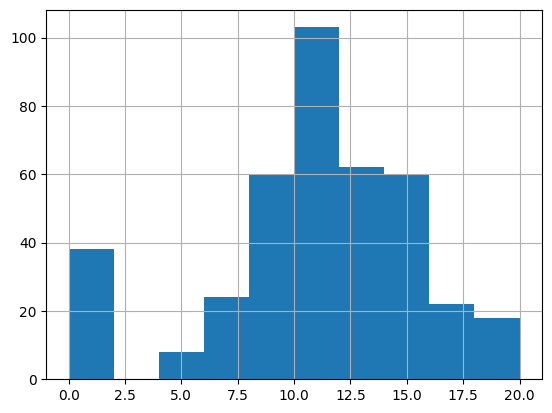

In [6]:
data["G3"].hist();

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [8]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


## 2. Понимаем, какая перед нами задача

Перед нами задача регрессии. Нашей целью является предсказание оценки учеников. Задача регрессии заключается в предсказании непрерывной переменной(оценки) на основе других факторов(пол, возраст и тд)

## 3. Делаем предобработку 

In [1]:
#Разделить выборку на тренировочную (train) и тестовую (test). Обратите внимание, что обучать скейлеры и определять, какими значениями вы будете заполнять пропуски, вы будете на train выборке, а применять и на train, и на test.
#Проверить пропуски в данных. Если они есть, заполнить одной из стратегий, предложенных в ноутбуке для семинара три. P.S. Для численных и категориальных переменных будут разные стратегии.
#Отнормировать численные переменные (StandardScaler, MinMaxScaler).
#Закодировать категориальные признаки по одной из стратегий.

In [9]:
import numpy as np

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [34]:
X = data.drop('G3', axis=1)
y = data['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17) # 80/20 

# Масштабирование числовых переменных
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Кодирование категориальных переменных
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

## 4. Обучение на тренировочном множестве и подсчет метрик

In [35]:
#Линейную модель (LogisticRegression, LinearRegression)
#Деревянную модель (DecisionTreeClassifier, DecisionTreeRegressor) (тут советую попробовать разные глубины деревьев)
#K-ближайших соседей (KNeighborsClassifier, KNeighborsRegressor) (тут тоже есть смысл попробовать разные k)
#Случайный лес (RandomForestClassifier, RandomForestRegressor)

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, root_mean_squared_error

In [37]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree (depth=5)": DecisionTreeRegressor(max_depth=5),
    "KNN (k=3)": KNeighborsRegressor(n_neighbors=3),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=17)
}

In [38]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)  # Обучение на тренировочных данных
    train_preds = model.predict(X_train)  # На основе тренировочных
    test_preds = model.predict(X_test)  # На основе тестовых

    # На тренировочном наборе
    train_mae = mean_absolute_error(y_train, train_preds)
    train_rmse = root_mean_squared_error(y_train, train_preds)
    train_mape = mean_absolute_percentage_error(y_train, train_preds)

    # На тестовом наборе
    test_mae = mean_absolute_error(y_test, test_preds)
    test_rmse = root_mean_squared_error(y_test, test_preds)
    test_mape = mean_absolute_percentage_error(y_test, test_preds)

    return {
        "TrainMAE": train_mae, "TrainRMSE": train_rmse, "TrainMape": train_mape,
        "TestMAE": test_mae, "TestRMSE": test_rmse, "TestMape": test_mape
    }

median_train = y_train.median()
y_train.fillna(median_train, inplace=True)

median_test = y_test.median()
y_test.fillna(median_test, inplace=True)

results = {}
for name, model in models.items():
    results[name] = evaluate_model(model, X_train_transformed, y_train, X_test_transformed, y_test)

In [39]:
for name, metrics in results.items():
    print(f"{name} Training MAE: {metrics['TrainMAE']:.2f}, RMSE: {metrics['TrainRMSE']:.2f}, MAPE: {metrics['TrainMape']:.2f}")
    print(f"{name} Testing MAE: {metrics['TestMAE']:.2f}, RMSE: {metrics['TestRMSE']:.2f}, MAPE: {metrics['TestMape']:.2f}\n")

Linear Regression Training MAE: 1.19, RMSE: 1.80, MAPE: 1657395476988318.75
Linear Regression Testing MAE: 1.37, RMSE: 2.01, MAPE: 1791062688040986.00

Decision Tree (depth=5) Training MAE: 0.60, RMSE: 1.03, MAPE: 311274398871047.69
Decision Tree (depth=5) Testing MAE: 1.07, RMSE: 1.83, MAPE: 664656676881779.25

KNN (k=3) Training MAE: 1.57, RMSE: 2.19, MAPE: 1914504904884292.75
KNN (k=3) Testing MAE: 1.87, RMSE: 2.49, MAPE: 2109280838135548.75

Random Forest Training MAE: 0.38, RMSE: 0.63, MAPE: 395917714077064.56
Random Forest Testing MAE: 1.08, RMSE: 1.50, MAPE: 778153606501358.00



## Сравнение метрик относительно train/test, так и относительно разных моделей.

In [ ]:
Какая модель справилась лучше с поставленной задачей?
Random Forest справилась лучше всего с поставленной задачей, так как показала наименьшее значение MAE и RMSE на тестовом наборе данных.
Имеет ли место переобучение?
Высокая ошибка на тесте = переобучились
Если метрики на треине и на тесте примерно одинаковые, значит мы не переобучились 
Имеет ли место недообучение?
Высокие ошибки на треине и на тесте = недообучились
Как можно улучшить метрики моделей?
Для моделей с гиперпараметрами (например, деревья решений, случайный лес, метод ближайших соседей) можно провести поиск оптимальных значений этих параметров. Это может значительно повысить производительность модели.
Для модели линейной регрессии (linear_regressor) можно попробовать использовать более сложные модели.